# Clustering

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import random
%matplotlib inline

In [ ]:
# Classification: Given labels and features, we can predict labels.
# Clustering: We have data set with no labels, but yes features, so 
# we use those features to create labels.

In [7]:
def make_fake_data_point():
    seed = random.randint(0,10)
    if seed < 2:
        return random.normalvariate(170, 40)
    if seed < 4:
        return random.normalvariate(80, 20)
    if seed < 5:
        return random.normalvariate(120, 10)
    if seed < 8:
        return random.normalvariate(320, 15)
    if seed < 9:
        return random.normalvariate(210, 10)
    return random.normalvariate(30, 5)

In [11]:
def create_fake_data(number_of_points):
    return pd.DataFrame([int(make_fake_data_point()) for i in range(number_of_points)], columns=["weight"])

In [12]:
df = create_fake_data(1000)

In [13]:
df.head()

,weight
0,321
1,25
2,73
3,151
4,336


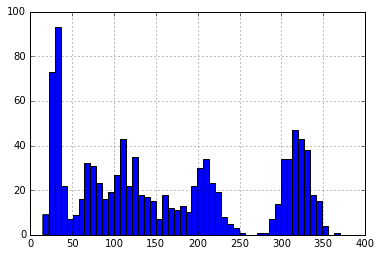

In [14]:
df['weight'].hist(bins=50)

# K-means

In [27]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=6, verbose=False) #number of clusters, verbose tells us what KMeans is actually doing

In [28]:
km.fit(df[['weight']])

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=6, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=False)

In [29]:
df['prediction'] = km.predict(df[['weight']])

prediction
0    Axes(0.125,0.125;0.775x0.775)
1    Axes(0.125,0.125;0.775x0.775)
2    Axes(0.125,0.125;0.775x0.775)
3    Axes(0.125,0.125;0.775x0.775)
4    Axes(0.125,0.125;0.775x0.775)
5    Axes(0.125,0.125;0.775x0.775)
Name: weight, dtype: object

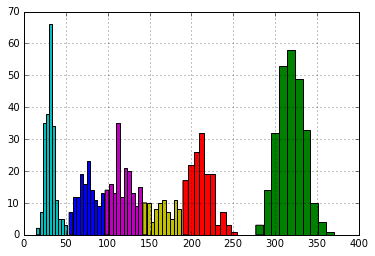

In [31]:
df.groupby('prediction')['weight'].hist(bins=10)

In [32]:
df = pd.read_csv("nba_2013_cleaned.csv")

In [33]:
df.head()

,Name,Age,Team,POS,Number,Salary,Height,Weight,Years,1st Year,DOB,School,City,State/Province,Country,Race,HS Only
0,"Gee, Alonzo",26,Cavaliers,F,33,3250000.0,78,219,4,2009,5/29/1987,Alabama,"Riviera Beach, FL",Florida,US,Black,No
1,"Wallace, Gerald",31,Celtics,F,45,10105855.0,79,220,12,2001,7/23/1982,Alabama,"Sylacauga, AL",Alabama,US,Black,No
2,"Williams, Mo",30,Trail Blazers,G,25,2652000.0,73,195,10,2003,12/19/1982,Alabama,"Jackson, MS",Mississippi,US,Black,No
3,"Gladness, Mickell",27,Magic,C,40,762195.0,83,220,2,2011,7/26/1986,Alabama A&M,"Birmingham, AL",Alabama,US,Black,No
4,"Jefferson, Richard",33,Jazz,F,44,11046000.0,79,230,12,2001,6/21/1980,Arizona,"Los Angeles, CA",California,US,Black,No


In [35]:
df = df[(df['POS'] == 'C') | (df['POS'] == 'F') | (df['POS'] == 'G')]

In [38]:
df['POS'].value_counts()

G    175
F    142
C     67
Name: POS, dtype: int64

In [40]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['POS_label'] = le.fit_transform(df['POS'])
df[['POS', 'POS_label']].head()

,POS,POS_label
0,F,1
1,F,1
2,G,2
3,C,0
4,F,1


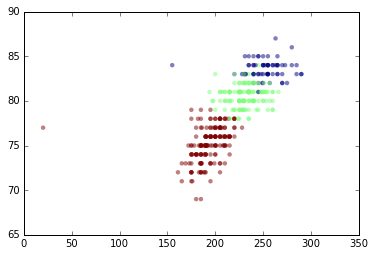

In [42]:
plt.scatter(df['Weight'], df['Height'], edgecolor='none', c=df['POS_label'], alpha=0.5)

In [72]:
from sklearn.cluster import KMeans

In [73]:
km = KMeans(n_clusters=4)
km.fit(df[['Weight', 'Height']])

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=4, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

In [74]:
df['cluster_4'] = km.predict(df[['Weight', 'Height']])

In [75]:
df.head(2)

,Name,Age,Team,POS,Number,Salary,Height,Weight,Years,1st Year,DOB,School,City,State/Province,Country,Race,HS Only,POS_label,cluster_4
0,"Gee, Alonzo",26,Cavaliers,F,33,3250000.0,78,219,4,2009,5/29/1987,Alabama,"Riviera Beach, FL",Florida,US,Black,No,1,3
1,"Wallace, Gerald",31,Celtics,F,45,10105855.0,79,220,12,2001,7/23/1982,Alabama,"Sylacauga, AL",Alabama,US,Black,No,1,3


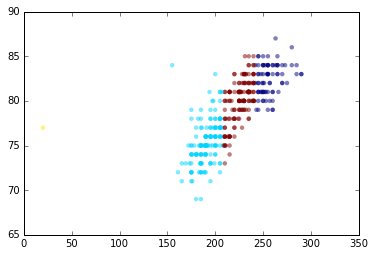

In [76]:
plt.scatter(df['Weight'], df['Height'], edgecolor='none', c=df['cluster_4'], alpha=0.5)

(0, 350)

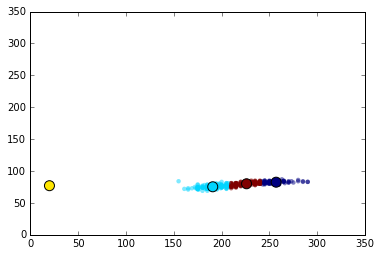

In [78]:
import numpy as np
plt.scatter(df['Weight'], df['Height'], edgecolor='none', c=df['cluster_4'], alpha=0.5)
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], s=100, c=np.unique(km.labels_))
plt.xlim([0,350])
plt.ylim([0,350])

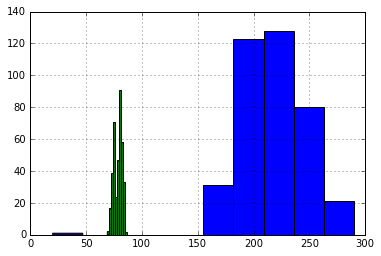

In [81]:
df['Weight'].hist()
df['Height'].hist()

In [82]:
from sklearn import preprocessing

In [84]:
df['scaled_height'] = preprocessing.scale(df['Height'])
df['scaled_weight'] = preprocessing.scale(df['Weight'])

/usr/local/lib/python3.5/site-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.5/site-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


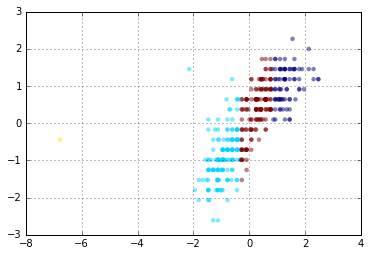

In [85]:
import numpy as np
plt.scatter(df['scaled_weight'], df['scaled_height'], edgecolor='none', c=df['cluster_4'], alpha=0.5)
plt.grid()

In [86]:
#Make new KMeans, 3 clusters
#fit it iwiht the scaled weight, height
#predict it based on scaled weight and height
#store those labels into a new column
#graph it

In [87]:
#Make new KMeans, 3 clusters
km = KMeans(n_clusters=3)
km.fit(df[['scaled_weight', 'scaled_height']])

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=3, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

In [94]:
df['scaled_prediction'] = km.predict(df[['scaled_weight', 'scaled_height']])
df['scaled_prediction'].value_counts()

1    159
0    119
2    106
Name: scaled_prediction, dtype: int64

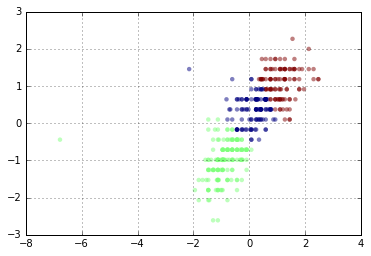

In [95]:
import numpy as np
plt.scatter(df['scaled_weight'], df['scaled_height'], edgecolor='none', c=df['scaled_prediction'], alpha=0.5)
plt.grid()

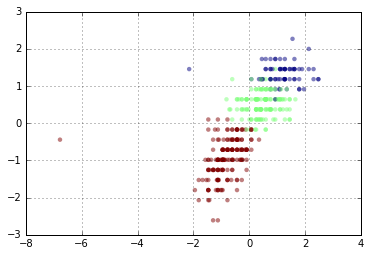

In [96]:
plt.scatter(df['scaled_weight'], df['scaled_height'], edgecolor='none', c=df['POS_label'], alpha=0.5)
plt.grid()

In [97]:
df.groupby('scaled_prediction')['POS'].value_counts()

scaled_prediction  POS
0                  F      101
                   G       16
                   C        2
1                  G      159
2                  C       65
                   F       41
Name: POS, dtype: int64

In [98]:
#Other ways would be i.e. to work with DBScan